In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sympy import symbols, sin, cos, diff, lambdify
%matplotlib notebook

C:\Users\Антон\AppData\Local\Temp\ipykernel_4076\472431576.py:48: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x_vals[i], y_vals[i])


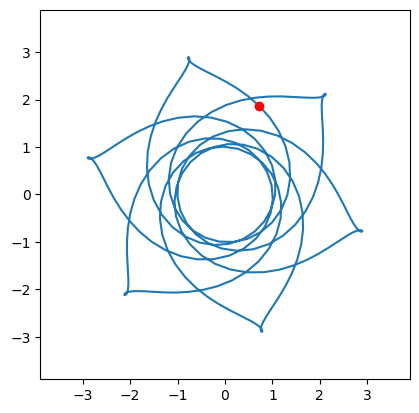

In [30]:
# 1. Определим функции для полярных координат r(t) и phi(t)
t = symbols('t', real=True)
r_expr = 2 + sin(6*t)
phi_expr = 7*t + 1.2*cos(6*t)

# 1.1: выражения для скорости в полярных координатах:
r_dot_expr = diff(r_expr, t)
phi_dot_expr = diff(phi_expr, t)

# 1.2. выражения для ускорения в полярных координатах:
r_ddot_expr = diff(r_dot_expr, t)
phi_ddot_expr = diff(phi_dot_expr, t)

# 2. Преобразуем sympy-выражения в числовые лямбда-функции с помощью sympy.lambdify()
r_func = lambdify(t, r_expr)
phi_func = lambdify(t, phi_expr)
r_dot_func = lambdify(t, r_dot_expr)
phi_dot_func = lambdify(t, phi_dot_expr)
r_ddot_func = lambdify(t, r_ddot_expr)
phi_ddot_func = lambdify(t, phi_ddot_expr)

# 3. Массив значений времени + перевод в декартовы координаты
t_values = np.linspace(0, 2*np.pi, 300)
x_vals = [float(r_func(t_val) * cos(phi_func(t_val))) for t_val in t_values]
y_vals = [float(r_func(t_val) * sin(phi_func(t_val))) for t_val in t_values]
vx_vals, vy_vals = [], []
for t_val in t_values:
    r = r_func(t_val)
    phi = phi_func(t_val)
    r_dot = r_dot_func(t_val)
    phi_dot = phi_dot_func(t_val)
    vx = r_dot * np.cos(phi) - r * phi_dot * np.sin(phi)
    vy = r_dot * np.sin(phi) + r * phi_dot * np.cos(phi)
    vx_vals.append(vx)
    vy_vals.append(vy)

# 4. Подготовка вывода графика на экран
fig, ax = plt.subplots()
ax.set_xlim(min(x_vals)-1, max(x_vals)+1)
ax.set_ylim(min(y_vals)-1, max(y_vals)+1)
ax.set_box_aspect(1)
ax.plot(x_vals, y_vals)

# 5. Анимация движущейся точки
point = ax.plot(x_vals[0], y_vals[0], 'o', color=[1,0,0])[0]

def animate(i):
    point.set_data(x_vals[i], y_vals[i])
    return [point]

ani = animation.FuncAnimation(fig, animate, frames=len(t_values), interval=20, blit=True)

plt.show()